In [1]:
import sklearn as sk
from sklearn.model_selection import GridSearchCV
from sklearn.mixture import GaussianMixture
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import os

In [2]:
dir = '/Users/fionshiau/Documents/2023Spring/Computational_Genomics/Final_Project/comp-geno-proj/'

In [3]:
dat = pd.read_csv(os.path.join(dir,'data','merged','1.3.1_raw.csv'))

In [4]:
dat.iloc[0:5,:]

,Unnamed: 0,chr,start,end,HiC_AB,H3K4me2,H3K9Ac,H3K4me3,ATAC-seq,H3K4me1,H3K27Ac,H3K27me3,RNAPol
0,chr1_0-5000,chr1,0,5000,-0.017687,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.00000,0.000000
1,chr1_5000-10000,chr1,5000,10000,-0.018022,0.000000,0.000000,0.00000,0.596187,0.0,1.096350,0.00000,0.133207
2,chr1_10000-15000,chr1,10000,15000,-0.018439,0.765027,0.000000,0.16184,1.260333,0.0,0.822263,2.46605,2.244871
3,chr1_15000-20000,chr1,15000,20000,-0.015277,0.824867,1.115655,0.16184,0.084689,0.0,0.000000,0.00000,3.256657
4,chr1_20000-25000,chr1,20000,25000,-0.006933,0.000000,0.000000,0.00000,0.034956,0.0,0.000000,0.00000,0.000000


In [23]:
mat = dat.iloc[:,4:].to_numpy()

In [24]:
# normalize non-HiC column to range from 0 to 1 by min-max scaler
#mat[:,1:] = (mat[:,1:]/mat[:,1:].sum(axis=0))*1e6
from sklearn.preprocessing import Normalizer
mat = np.hstack((mat[:,0].reshape(-1,1),Normalizer().fit_transform(X=mat[:,1:])))

In [25]:
# find optimal n_components for GMM
from joblib import Parallel, delayed, parallel_backend
def gmm_bic(X, n):
    gm = GaussianMixture(n_components = n, random_state=0).fit(X)
    return gm.bic(X)

output = Parallel(n_jobs=6)(delayed(gmm_bic)(mat, n=i) for i in range(1,15))

In [26]:
output

[-9124592.889881782,
 -11988025.742712302,
 -12751380.231873333,
 -14835230.709549671,
 -15538626.502479378,
 -16108872.670381162,
 -16534998.574328607,
 -16652670.32736222,
 -17102653.542000823,
 -17227447.55045845,
 -17474331.15534524,
 -17585588.19748967,
 -17760459.836460557,
 -17864549.36707506]

In [27]:
grad = np.gradient(output)

In [28]:
grad

array([-2863432.85283052, -1813393.67099578, -1423602.48341868,
       -1393623.13530302,  -636820.98041575,  -498186.03592461,
        -271898.82849053,  -283827.48383611,  -287388.61154811,
        -185838.80667221,  -179070.32351561,  -143064.34055766,
        -139480.58479269,  -104089.5306145 ])

<Axes: >

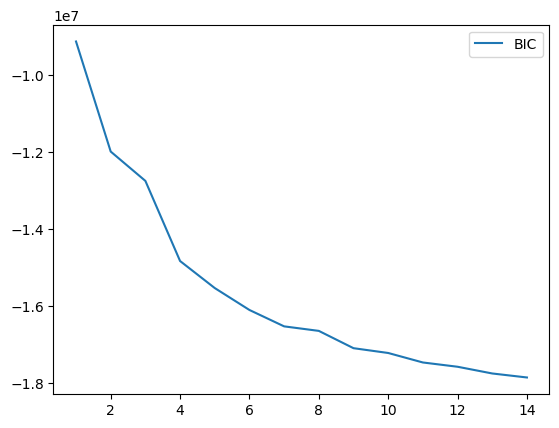

In [32]:
import seaborn as sns
sns.lineplot(x = range(1,len(grad)+1),y=output, label = 'BIC')

<Axes: >

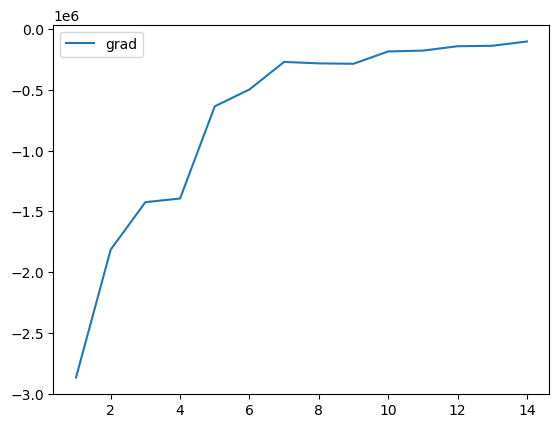

In [33]:
sns.lineplot(x = range(1,len(grad)+1),y=grad, label = 'grad')